# Exercise Sheet 4

Willy Oesterheld (508791)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

## 1 X-ray scattering

The plane spacing is (0.3948 ± 0.08461)nm.


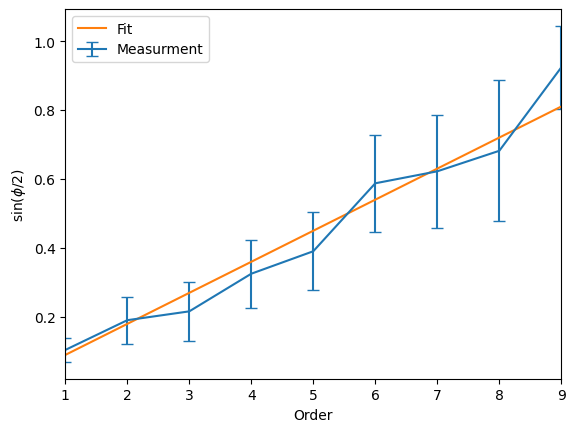

In [3]:
# given data points
n = np.arange(1,10)
phi = np.array([12, 22, 25, 38, 46, 72, 77, 86, 135]) * np.pi/180
phi_err = np.array([2, 4, 5, 6, 7, 10, 12, 16, 18]) * np.pi /180

# data to plot with propagated error
y = np.sin(phi/2)
y_err = np.abs(np.cos(phi/2)) * phi_err

# create plot
plt.errorbar(n, y, yerr=y_err, capsize=4.5, label="Measurment")
plt.xlim(n[0], n[-1])
plt.xlabel("Order")
plt.ylabel("sin($\phi$/2)")

# fit to y = ax+b
coeff, info = np.polynomial.polynomial.polyfit(n, y, deg=[1], w=y_err, full=True)
plt.plot(n, coeff[1]*n, label="Fit")
plt.legend()

# calculate plane spacing
l = 0.0711 # in nm
a = coeff[1]
a_err = np.sqrt(info[0][0])
d = l/2/a
d_err = l/2/(a**2) * a_err
print(f"The plane spacing is ({d:.4} ± {d_err:.4})nm.")

## 2 Ohm's Law

The covariance matrix is given by
$$
C_{RV} = 
\begin{bmatrix}
(\sigma_R+S_R)^2                && (\sigma_R+S_R)(\sigma_V+S_V) \\ 
(\sigma_R+S_R)(\sigma_V+S_V)    && (\sigma_V+S_V)^2
\end{bmatrix}
$$

The following code calculates the coefficients


In [4]:
sigma_R = 0.2*1e3
sigma_V = 0.3
S_R = 0
S_V = 0.2

a = sigma_R + S_R
b = sigma_V + S_V

C = [[a**2, a*b], [a*b, b**2]]

print(C)

[[40000.0, 100.0], [100.0, 0.25]]


$$
C_{RV} = 
\begin{bmatrix}
40000               && 100 \\ 
100    && 0.25
\end{bmatrix}
$$

Now calculate the current $I=\frac{V}{R}$ and error $\sigma_{I} = \sqrt{(\frac{(\sigma_{V}+S_V)}{R})^2 + (\frac{V\sigma_R}{R^2})^2}$

In [5]:
V = 12
R = 1e4
I = V/R
I_err = np.sqrt((a/R)**2 + (V*b/R**2)**2)
print((I, I_err))

(0.0012, 0.02000000000009)


$
I = (0.0012 \pm 0.0200) A
$

## 3 Estimators

In [6]:
num_sample = 10
num_rep = 10000

c = 170
w = 10


def gmean(x):
    return np.exp(np.sum(np.log(x), axis=1)/num_sample)

estimator_names = ("Arithmetic Mean", "Median\t", "Geometric Mean", "Mode\t")
estimators = (lambda x : np.mean(x, axis=1), lambda x : np.median(x, axis=1), lambda x : gmean(x), lambda x : sp.stats.mode(x, axis=1, keepdims=False)[0])

def compareEstimators(x):
    for i in range(0,4):
        y = estimators[i](x)
        bias = np.mean(y-c)
        var = np.var(y)
        print(f"{estimator_names[i]}")
        print(f"\tBias: {bias:.4f}\t\t Variance: {var:.4f}")


rng = np.random.default_rng(42)
sz = (num_rep, num_sample)

print("Gaussian distribution\n")
x = rng.normal(loc=c, scale=w, size=sz)
compareEstimators(x)
print("\n----------------------------------------------------")

print("Uniform distribution\n")
x = rng.uniform(low=c-w/2, high=c+w/2, size=sz)
compareEstimators(x)


Gaussian distribution

Arithmetic Mean
	Bias: -0.0423		 Variance: 10.0966
Median	
	Bias: -0.0558		 Variance: 14.0393
Geometric Mean
	Bias: -0.3101		 Variance: 10.1349
Mode	
	Bias: -15.4850		 Variance: 34.8467

----------------------------------------------------
Uniform distribution

Arithmetic Mean
	Bias: -0.0099		 Variance: 0.8346
Median	
	Bias: -0.0185		 Variance: 1.9025
Geometric Mean
	Bias: -0.0320		 Variance: 0.8347
Mode	
	Bias: -4.0852		 Variance: 0.6727
